## LATAR BELAKANG
Transportasi merupakan salah satu aspek krusial dalam kehidupan kota besar seperti New York City. Setiap harinya, jutaan orang menggunakan berbagai moda transportasi, termasuk layanan taksi. Untuk mendukung transparansi dan perencanaan kota, New York City Taxi and Limousine Commission (TLC) menyediakan data perjalanan taksi dalam bentuk dataset publik, salah satunya adalah NYC TLC Trip Record.

# URAIAN MASALAH
1. Bagaimana kegiatan operasional vendor VeriFone Inc. dan Creative Mobile Technologies, LLC dari segi total perjalanan yang ditempuh, pendapatan, durasi perjalanan?
2. Metode pembayaran apa yang paling sering digunakan oleh penumpang kedua vendor tersebut?
3. Zona mana saja yang paling sering menjadi titik penjemputan?
4. Bagaimana perilaku penumpang taksi kedua vendor tersebut?

## TUJUAN ANALISIS
Sebagai seorang data analyst, tujuan dalam analisis data ini yaitu:
1. Memberikan wawasan mengenai operasional perusahaan, pola perjalanan, dan perilaku penumpang yang disajikan melalui analisis data yang berdasarkan dataset NYC TLC Trip Record.
2. Memberikan saran dan evaluasi guna meingkatkan layanan VeriFone Inc. dan Creative Mobile Technologies.

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind


## DOMAIN KNOWLEDGE
Terdapat 18 kolom dalam dataset ini, berikut adalah penjelasannya:
1. VendorID : Vendor ID adalah kode yang mengidentifikasi penyedia teknologi atau perusahaan taksi yang merekam data perjalanan.
Secara umum, Vendor ID memiliki dua nilai utama:
    - 1 = Creative Mobile Technologies, LLC (CMT)
    - 2 = VeriFone Inc. (VTS)
2. lpep_pickup_datetime : Tanggal dan waktu Ketika argo mulai berjalan.
3. lpep_dropoff_datetime : Tanggal dan waktu Ketika argo berhenti berjalan.
4. Passenger_count : Jumlah penumpang dalam taksi.
5. trip_distance : Jarak perjalanan taksi.
6. PULocationID : Zona ketika taksi meter mulai berjalan.
7. DOLoactionID : Zona ketika taksi meter berhenti berjalan.
8. RateCodeID : Kode perjalanan sebagai hasil akhir dari perjalanan.
    - Standard Rate (1)
        - Tarif biasa yang digunakan dalam perjalanan reguler dalam kota (misalnya, dalam wilayah New York City).
    - JFK (2)
        - Tarif tetap yang berlaku untuk perjalanan dari atau ke Bandara Internasional John F. Kennedy (JFK).
    - Newark (3)
        - Tarif tetap yang berlaku untuk perjalanan dari atau ke Bandara Newark Liberty (EWR) di New Jersey.
    - Nassau or Westchester (4)
        - Tarif untuk perjalanan yang melewati batas New York City menuju Nassau County (Long Island) atau Westchester County.
    - Negotiated Fare (5)
        - Tarif yang telah dinegosiasikan sebelumnya antara pengemudi/taksi dan penumpang, bukan berdasarkan tarif meteran standar.
    - Group Ride (6)
        - Tarif khusus untuk perjalanan yang dilakukan bersama penumpang lain dalam sistem carpool atau layanan berbagi perjalanan.
9. Store_and_fwd_flag : Pernyataan ini menjelaskan flag (penanda) dalam data perjalanan yang menunjukkan apakah catatan perjalanan (trip record) disimpan di memori kendaraan sebelum dikirim ke vendor.
    - Jika Y (Yes), berarti perjalanan adalah "store and forward trip", artinya kendaraan tidak memiliki koneksi ke server saat perjalanan terjadi, sehingga data perjalanan disimpan sementara di memori kendaraan sebelum akhirnya dikirim ke vendor ketika koneksi tersedia.
    - Jika N (No), berarti perjalanan langsung dikirim ke server tanpa perlu disimpan di memori kendaraan terlebih dahulu.
10. Payment_type : Tipe pembayaran yang dilakukan oleh penumpang.
    - 1 : Credit Card
    - 2 : Cash
    - 3 : No Charge
    - 4 : Dispute
    - 5 : Unknown
    - 6 : Voided Trip
11. Fare_amount : Tarif perjalanan berdasarkan waktu dan jarak perjalanan yang dihitung dalam taksi meter.
12. Extra : Biaya tambahan ($0.50 atau $1 biaya tambahan untuk jam sibuk).
13. MTA_tax : Berlaku secara otomatis $0.50 berdasarkan taksi meter.
14. Improvement_surcharge : Biaya tambahan sebesar $0.30 yang dikenakan pada setiap perjalanan taksi yang dipesan (hailed trip) pada saat flag drop (saat perjalanan dimulai).
15. Tip_amount : Secara otomatis diisi untuk tip yang diberikan melalui kartu kredit, tetapi tip tunai tidak termasuk dalam data.
16. Tolls_amount : Biaya penggunaan toll apabila perjalanan melalui toll
17. Total_amount : Total tagihan penumpang atas perjalanan yang dilakukan.
18. Trip_type : Menjelaskan apakah perjalanan dilakukan dengan menyetop taksi langsung atau dengan melakukan pemesanan taksi dengan aplikasi.



In [2]:
df = pd.read_csv("NYC TLC Trip Record.csv")
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_22296\1610220439.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NYC TLC Trip Record.csv")


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [3]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

## DATA CLEANING
Melakukan pembersihan data dengan mengisi missing value pada kolom-kolom di dataset

Mengisi missing value pada kolom store_and_fwd_flag berdasarkan kolom PULocationID, dengan asumsi bahwa pickup location/ area penjemputan memiliki koneksi internet yang berbeda sehingga ada data tidak terkirim ke server, ataupun ada data yang langsung tercatat dan terkirim ke server.

In [4]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna(
    df.groupby('PULocationID')['store_and_fwd_flag'].transform(
        lambda x: x.mode()[0] if not x. mode().empty else None))

In [5]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0])

Mengisi missing value pada kolom RatecodeID berdasarkan kolom DOLocationID, dengan asumsi bahwa jenis tarif bisa bergantung pada lokasi tujuan perjalanan tertentu.

In [6]:
df['RatecodeID'] = df['RatecodeID'].fillna(
    df.groupby('DOLocationID')['RatecodeID'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else None))

In [7]:
df["RatecodeID"] = df["RatecodeID"].fillna(df['RatecodeID'].mode()[0])

Mengisi nilai NaN pada kolom "payment_type" berdasarkan pada kolom "tip_amount". Diasumsikan apabila "tip_amount" bernilai 0 maka artinya pemeberian uang tip diberikan secara tunai sehingga tidak tercatat dalam sistem, sebaliknya jika "tip_amount" bernilai lebih dari 0 maka artinya pemberian uang tip dilakukan dengan kartu kredit sehingga tercatat dalam sistem.

In [8]:
df.loc[df['payment_type'].isna() & (df['tip_amount']>0), 'payment_type'] = 1
df.loc[df['payment_type'].isna() & (df['tip_amount']==0), 'payment_type'] = 2

Menghapus kolom "ehail_fee" karena seluruh kolom terssebut terdapat missing value, diasumsikan bahwa tidak terdapat penumpang yang memesan layanan taxi dengan menggunakan aplikasi e-hailing.

In [9]:
df.drop(columns=['ehail_fee'],inplace=True)

Mengisi missing value pada kolom "passenger_count" berdasarkan kolom "PULocationID" dengan asumsi bahwa beberapa lokasi lebih sering memiliki jumlah penumpang yang banyak.

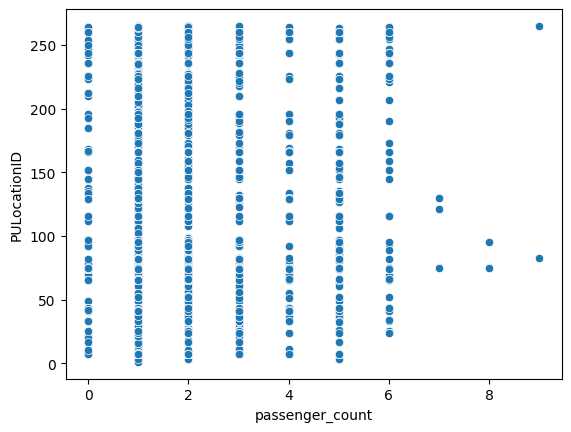

In [10]:
sns.scatterplot(data=df, x='passenger_count', y='PULocationID')
plt.show()

In [11]:
df['passenger_count'] = df['passenger_count'].fillna(
    df.groupby('PULocationID')['passenger_count'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else None
    )
)

Mengisi missing value pada kolom "passenger_count"

In [12]:
df["passenger_count"] = df["passenger_count"].fillna(df['passenger_count'].mode()[0])

In [13]:
df['trip_type'] = df['trip_type'].fillna(df.groupby(['PULocationID', 'payment_type'])['trip_type']
    .transform(lambda x: x.mode()[0] if not x.mode().empty else 1)
)

In [14]:
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(
    df.groupby(pd.qcut(df['fare_amount'], q=4))['congestion_surcharge'].transform('median')
)

C:\Users\HP\AppData\Local\Temp\ipykernel_22296\364741929.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df['fare_amount'], q=4))['congestion_surcharge'].transform('median')


In [15]:
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

Menghapus nilai negatif pada kolom fare_amount, dan menghapus passenger_count yang tercatat 0 karena data diasumsikan tidak valid atau tidak tercatat dengan benar.

In [16]:
df = df[(df['fare_amount']>0) & (df['passenger_count']!=0)]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,2.0,1.0,0.00
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,2.0,1.0,0.00
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,1.0,1.0,0.00
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,1.0,1.0,0.00


Agar kita lebih mengetahui LocationID, maka ditambahkan suatu dataset yang menjelaskan kode-kode lokasi beserta nama lokasinya. Adapun sumber data diperoleh dari https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [17]:
zone = pd.read_csv('taxi_zone_lookup.csv')

In [18]:
df = df.merge(zone, how='left', left_on='PULocationID', right_on='LocationID')
df = df.rename(columns={
    'Borough': 'PU_Borough',
    'Zone': 'PU_Zone',
    'service_zone': 'PU_service_zone'
})

In [19]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,LocationID,PU_Borough,PU_Zone,PU_service_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,0.0,1.0,24.18,1.0,1.0,2.75,166,Manhattan,Morningside Heights,Boro Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,0.0,1.0,15.84,1.0,1.0,0.00,24,Manhattan,Bloomingdale,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,0.0,1.0,11.64,1.0,1.0,0.00,223,Queens,Steinway,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,0.0,1.0,10.20,1.0,1.0,0.00,41,Manhattan,Central Harlem,Boro Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,0.0,1.0,8.00,1.0,1.0,0.00,41,Manhattan,Central Harlem,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67612,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,4070.82,15.70,...,0.0,1.0,16.70,2.0,1.0,0.00,49,Brooklyn,Clinton Hill,Boro Zone
67613,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,...,0.0,1.0,5.41,2.0,1.0,0.00,10,Queens,Baisley Park,Boro Zone
67614,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,...,0.0,1.0,21.04,1.0,1.0,0.00,66,Brooklyn,DUMBO/Vinegar Hill,Boro Zone
67615,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,...,0.0,1.0,19.18,1.0,1.0,0.00,225,Brooklyn,Stuyvesant Heights,Boro Zone


Setelah kedua dataset digabung, masih terdapat missing value pada beberapa kolom, maka dari itu data kosong tersebut akan dibersihkan dengan cara dihapus.

In [20]:
df.isna().sum()

VendorID                   0
lpep_pickup_datetime       0
lpep_dropoff_datetime      0
store_and_fwd_flag         0
RatecodeID                 0
PULocationID               0
DOLocationID               0
passenger_count            0
trip_distance              0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
improvement_surcharge      0
total_amount               0
payment_type               0
trip_type                  0
congestion_surcharge       0
LocationID                 0
PU_Borough                65
PU_Zone                  127
PU_service_zone          192
dtype: int64

In [21]:
df = df.dropna(subset=['PU_Borough', 'PU_Zone', 'PU_service_zone'])

In [22]:
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
LocationID               0
PU_Borough               0
PU_Zone                  0
PU_service_zone          0
dtype: int64

Setelah data dibersihkan, maka kita mempunyai 67245 data yang siap untuk dilakukan analisis.

In [23]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,LocationID,PU_Borough,PU_Zone,PU_service_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,0.0,1.0,24.18,1.0,1.0,2.75,166,Manhattan,Morningside Heights,Boro Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,0.0,1.0,15.84,1.0,1.0,0.00,24,Manhattan,Bloomingdale,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,0.0,1.0,11.64,1.0,1.0,0.00,223,Queens,Steinway,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,0.0,1.0,10.20,1.0,1.0,0.00,41,Manhattan,Central Harlem,Boro Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,0.0,1.0,8.00,1.0,1.0,0.00,41,Manhattan,Central Harlem,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67612,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,4070.82,15.70,...,0.0,1.0,16.70,2.0,1.0,0.00,49,Brooklyn,Clinton Hill,Boro Zone
67613,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,...,0.0,1.0,5.41,2.0,1.0,0.00,10,Queens,Baisley Park,Boro Zone
67614,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,...,0.0,1.0,21.04,1.0,1.0,0.00,66,Brooklyn,DUMBO/Vinegar Hill,Boro Zone
67615,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,...,0.0,1.0,19.18,1.0,1.0,0.00,225,Brooklyn,Stuyvesant Heights,Boro Zone


In [24]:
pd.set_option('display.max_colwidth', 1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,65987,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:49:30, ...]"
2,lpep_dropoff_datetime,65932,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

Memberikan nama vendor agar kita mengetahui vendor berdasarkan namanya.

In [25]:
vendor_name = {
    1 : 'Creative Mobile Technologies, LLC',
    2 : 'VeriFone Inc.'
}

# 1. Analisis Total Perjalanan yang Ditempuh Oleh Setiap Vendor

In [26]:
total_trips = df.groupby('VendorID')[['trip_distance']].sum().reset_index().sort_values(by='trip_distance',ascending=False)
total_trips['VendorID'] = total_trips['VendorID'].replace(vendor_name)
total_trips.rename(columns={'VendorID': 'vendor_name','trip_distance' : 'total_trips'})

,vendor_name,total_trips
1,VeriFone Inc.,532249.44
0,"Creative Mobile Technologies, LLC",19919.70


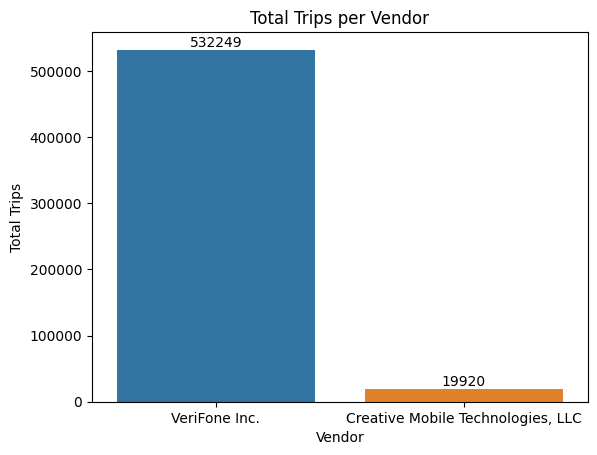

In [35]:
ax1 = sns.barplot(data=total_trips, x='VendorID', y='trip_distance', hue='VendorID')
# Menambahkan anotasi pada bar
for container in ax1.containers:
    for bar in container:
        height = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.1,
            f'{height:.0f}',
            ha='center',
            va='bottom'
        )
plt.xlabel("Vendor")
plt.ylabel("Total Trips")
plt.title("Total Trips per Vendor")
plt.show()

# Insight:
Berdasarkan data pada grafik, dapat diketahui bahwa perusahaan dengan VendorID 2 (VeriFone Inc.) memiliki total tempuh perjalanan yang lebih jauh dibandingkan dengan VendorID 1 (Creative Mobile Technologies, LLC). Hal ini menunjukkan bahwa VeriFone Inc. lebih dipercaya untuk melakukan perjalanan jauh.

# 2. Analisis Total Revenue per Vendor

In [28]:
total_revenue = df.groupby('VendorID')[['total_amount']].sum().reset_index().sort_values(by='total_amount', ascending=False)
total_revenue['VendorID'] = total_revenue['VendorID'].replace(vendor_name)
total_revenue.rename(columns={'VendorID': 'vendor_name','total_amount' : 'total_revenue'})

,vendor_name,total_revenue
1,VeriFone Inc.,1286745.13
0,"Creative Mobile Technologies, LLC",188283.17


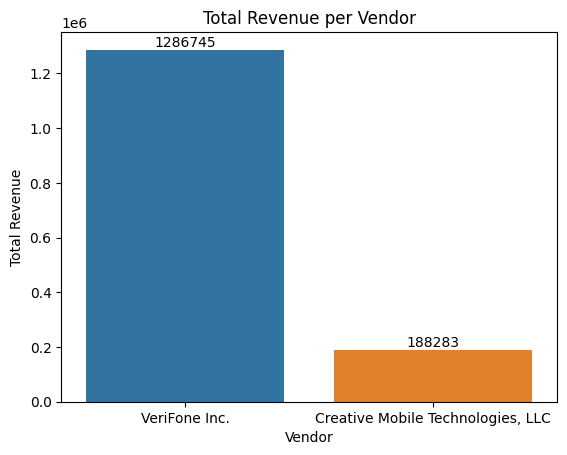

In [36]:
ax2 = sns.barplot(data=total_revenue, x='VendorID', y='total_amount', hue='VendorID')
# Menambahkan anotasi pada bar
for container in ax2.containers:
    for bar in container:
        height = bar.get_height()
        ax2.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.1,
            f'{height:.0f}',
            ha='center',
            va='bottom'
        )
plt.xlabel('Vendor')
plt.ylabel('Total Revenue')
plt.title("Total Revenue per Vendor")
plt.show()

# Insight
Berdasarkan data pada grafik Total Revenue per Vendor, dapat diketahui bahwa perusahaan dengan VendorID 2 (VeriFone Inc.) memiliki total revenue yang mencapai angka 1.2 juta dollar, sedangkan perusahaan dengan VendorID 1 (Creative Mobile Technologies, LLC ) hanya mampu menghasilkan total revenue sampai 200.000 dollar saja. Hal ini dapat menjadi indikasi bahwa VeriFone Inc. mampu melakukan kegiatan opersionalnya secara efisien guna memaksimalkan pendapatan.

# 3. Analisis Kontribusi Komponen Pendapatan Terhadap Total Pendapatan

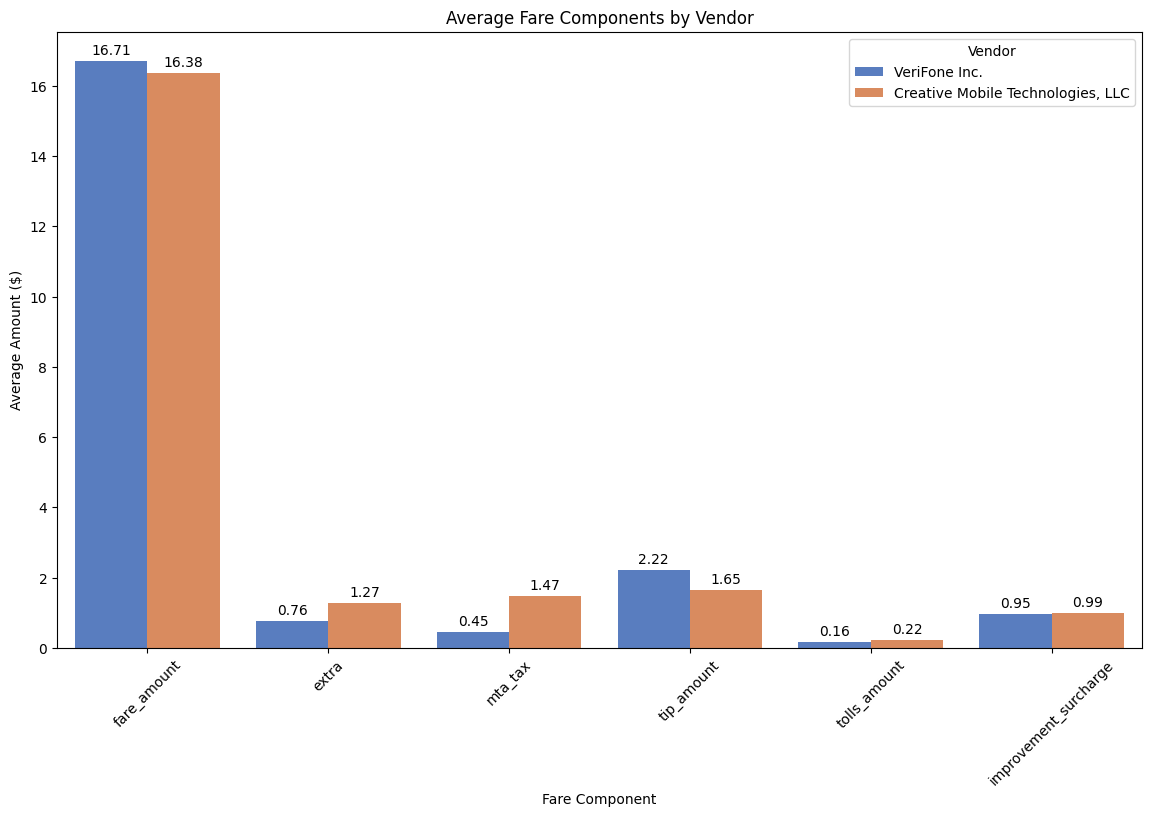

In [133]:
avg_revenue_components = df.groupby('VendorID')[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']].mean().reset_index().sort_values(by='VendorID', ascending=False)


melted_revenue_components = avg_revenue_components.melt(id_vars='VendorID', var_name='FareComponent', value_name='AverageAmount')

# Plot average fare components by vendor
plt.figure(figsize=(14, 8))
ax12 = sns.barplot(x='FareComponent', y='AverageAmount', hue='VendorID', data=melted_revenue_components, palette='muted')
for container in ax12.containers:
    for bar in container:
        height = bar.get_height()
        ax12.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.1,
            f'{height:.2f}',
            ha='center',
            va='bottom'
        )
plt.title('Average Fare Components by Vendor')
plt.xlabel('Fare Component')
plt.ylabel('Average Amount ($)')
plt.xticks(rotation=45)
plt.legend(title='Vendor')
plt.show()

# Insight
1. fare_amount (Tarif utama) merupakan komponen terbesar dari pendapatan di kedua vendor. Vendor dengan fare_amount lebih tinggi menunjukkan rata-rata perjalanan mereka mungkin lebih panjang atau memiliki tarif dasar lebih mahal.

2. Tip_amount (Tip pelanggan) tergolong kontributor signifikan kedua setelah fare. Jika salah satu vendor memiliki tip lebih tinggi secara rata-rata, ini bisa jadi indikasi:
    - Kualitas layanan lebih baik
    - Jenis metode pembayaran dominan (karena tip lebih sering muncul di pembayaran non-tunai)

3. extra, mta_tax, dan improvement_surcharge cenderung statis dan hampir sama antar vendor. Karena komponen ini ditentukan oleh peraturan kota (seperti New York City Taxi & Limousine Commission).

4. tolls_amount (biaya tol) Creative Mobile Technologies memiliki tolls lebih tinggi, artinya: Penumpang lebih sering melewati tol (mungkin mencakup area bandara atau antar-kota), dan perjalanan penumpang Creative Mobile Technologies lebih sering menuju zona dengan akses terbatas

# 4. Analisis Rata-Rata Durasi Perjalanan per Vendor

Sebelum kita melakukan analisis, langkah pertama yang dilakukan adalah merubah format kolom lpep_pickup_datetime, dan kolom lpep_dropoff_datetime menjadi format date time.

In [66]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

C:\Users\HP\AppData\Local\Temp\ipykernel_22296\4033538141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
C:\Users\HP\AppData\Local\Temp\ipykernel_22296\4033538141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])


Setelah merubah format, maka dibuatlah kolom baru dengan nama kolom trip_duration yang diperoleh dari kolom lpep_dropoff_datetime dikurangi dengan kolom lpep_pickup_datetime kemudian dibagi 60 agar keluar dalam hasil menit.

In [67]:
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds()/60

C:\Users\HP\AppData\Local\Temp\ipykernel_22296\3678212744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds()/60


In [68]:
avg_trip_durations = df.groupby('VendorID')[['trip_duration']].mean().reset_index().sort_values(by='trip_duration',ascending=False)
avg_trip_durations['VendorID'] = avg_trip_durations['VendorID'].replace(vendor_name)
avg_trip_durations.rename(columns={'VendorID': 'vendor_name','trip_duration' : 'avg_trip_duration'})

,vendor_name,avg_trip_duration
1,VeriFone Inc.,18.491894
0,"Creative Mobile Technologies, LLC",15.551977


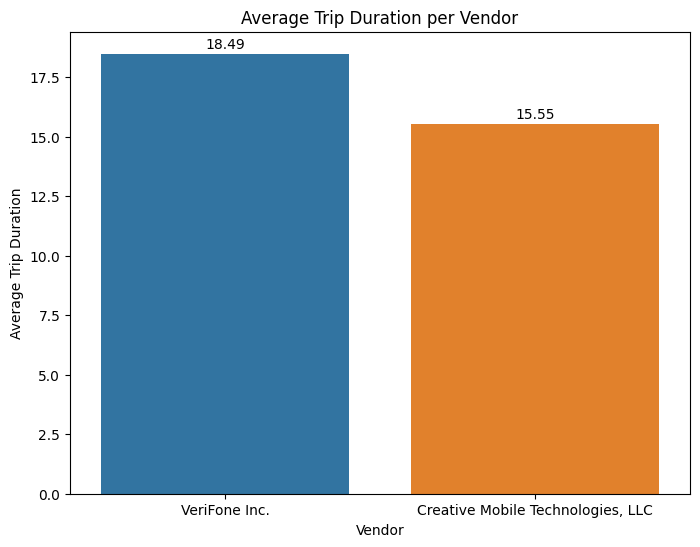

In [88]:
plt.figure(figsize=(8,6))
ax4 = sns.barplot(data=avg_trip_durations, x='VendorID', y='trip_duration', hue='VendorID')
# Menambahkan anotasi pada bar
for container in ax4.containers:
    for bar in container:
        height = bar.get_height()
        ax4.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.1,
            f'{height:.2f}',
            ha='center',
            va='bottom'
        )

# visualiasikan data
plt.xlabel('Vendor')
plt.ylabel('Average Trip Duration')
plt.title("Average Trip Duration per Vendor")
plt.show()

# Insight
Rata-rata durasi perjalanan pada kedua vendor tidak berbeda signifikan, Verfone Inc. memiliki rata-rata durasi perjalanan selama 18 menit, sedangkan Creative Mobile Technologies, LLC memiliki rata-rata durasi perjalanan selama 16 menit. Perbedaan rata-rata durasi ini dapat disebabkan karena perbedaan rute yang diambil serta perbedaan total trips yang ditempuh oleh kedua vendor terseut.

# 5. Analisis Rata-Rata Jarak Tempuh Perjalanan per Vendor

In [72]:
avg_trip_distance = df.groupby('VendorID')[['trip_distance']].mean().reset_index().sort_values(by='trip_distance',ascending=False)
avg_trip_distance['VendorID'] = avg_trip_distance['VendorID'].replace(vendor_name)
avg_trip_distance.rename(columns={'VendorID': 'vendor_name','trip_distance' : 'avg_trip_distance'})

,vendor_name,avg_trip_distance
1,VeriFone Inc.,9.102638
0,"Creative Mobile Technologies, LLC",2.224919


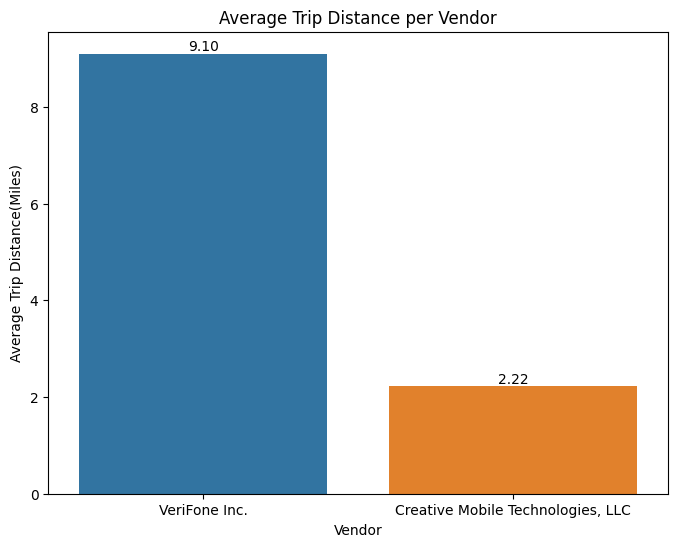

In [87]:
plt.figure(figsize=(8,6))
ax5 = sns.barplot(data=avg_trip_distance, x='VendorID', y='trip_distance', hue='VendorID')
# Menambahkan anotasi pada bar
for container in ax5.containers:
    for bar in container:
        height = bar.get_height()
        ax5.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0,
            f'{height:.2f}',
            ha='center',
            va='bottom'
        )
# Visualisasikan data
plt.xlabel('Vendor')
plt.ylabel('Average Trip Distance(Miles)')
plt.title("Average Trip Distance per Vendor")
plt.show()

# Insight
Rata-rata jarak tempuh perjalanan pada vendor VeriFone Inc. sejauh 9 miles, sedangkan rata-rata jarak tempuh perjalanan Creative Mobile Technologies, LLC hanya sejauh 2 miles.

# 6. Analisis Persebaran Metode Pembayaran Penumpang per Vendor

In [76]:
payment_counts = df['payment_type'].value_counts().sort_index()
payment_counts

payment_type
1.0    44128
2.0    22917
3.0    318  
4.0    60   
5.0    2    
Name: count, dtype: int64

Agar lebih mudah dalam membaca grafik, maka kita akan mendefinisikan payment_type sebagai berikut:

In [77]:
payment_labels = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

In [78]:
payment_vendor = df.groupby('VendorID')[['payment_type']].value_counts().reset_index()
payment_vendor['VendorID'] = payment_vendor['VendorID'].replace(vendor_name)
payment_vendor['payment_type'] = payment_vendor['payment_type'].replace(payment_labels)
payment_vendor

,VendorID,payment_type,count
0,"Creative Mobile Technologies, LLC",Credit Card,5952
1,"Creative Mobile Technologies, LLC",Cash,2790
2,"Creative Mobile Technologies, LLC",No Charge,180
3,"Creative Mobile Technologies, LLC",Dispute,29
4,"Creative Mobile Technologies, LLC",Unknown,2
5,VeriFone Inc.,Credit Card,38176
6,VeriFone Inc.,Cash,20127
7,VeriFone Inc.,No Charge,138
8,VeriFone Inc.,Dispute,31


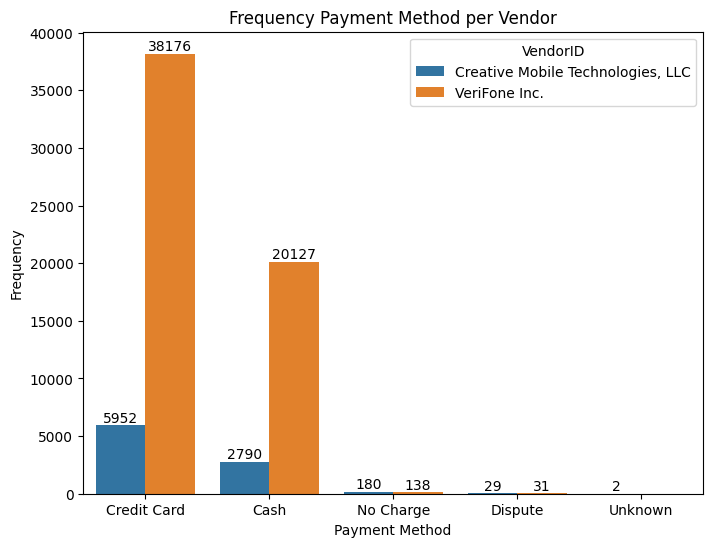

In [81]:
plt.figure(figsize=(8,6))
ax6 = sns.barplot(data=payment_vendor, x='payment_type', y='count', hue='VendorID')
# Menambahkan anotasi pada bar
for container in ax6.containers:
    for bar in container:
        height = bar.get_height()
        ax6.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0,
            f'{height:.0f}',
            ha='center',
            va='bottom'
        )
# Visualisasikan data
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.title("Frequency Payment Method per Vendor")
plt.show()

# Insight
Berdsarkan data diatas dapat diketahui bahwa metode pembayaran dengan menggunakan credit card paling banyak digunakan oleh penumpang pada kedua vendor. Metode pembayaran dengan menggunakan credit card merupakan pembayaran yang praktis, dan cepat, hal ini mengindikasikan bahwa sebagian besar penumpang merasa nyaman melakukan pembayaran dengan credit card.

# 7. Analisis Rata-Rata Jarak Berdasarkan Metode Pembayaran per Vendor

In [102]:
avg_trip_distace_by_payment_method_per_vendor = df.groupby(['VendorID','payment_type'])[['trip_distance']].mean().reset_index().sort_values(by='trip_distance', ascending=False)
avg_trip_distace_by_payment_method_per_vendor['VendorID'] = avg_trip_distace_by_payment_method_per_vendor['VendorID'].replace(vendor_name)
avg_trip_distace_by_payment_method_per_vendor['payment_type'] = avg_trip_distace_by_payment_method_per_vendor['payment_type'].replace(payment_labels)
avg_trip_distace_by_payment_method_per_vendor

,VendorID,payment_type,trip_distance
5,VeriFone Inc.,Credit Card,11.907238
6,VeriFone Inc.,Cash,3.857852
1,"Creative Mobile Technologies, LLC",Cash,2.463118
0,"Creative Mobile Technologies, LLC",Credit Card,2.136526
3,"Creative Mobile Technologies, LLC",Dispute,1.962069
2,"Creative Mobile Technologies, LLC",No Charge,1.522778
7,VeriFone Inc.,No Charge,0.190580
8,VeriFone Inc.,Dispute,0.175484
4,"Creative Mobile Technologies, LLC",Unknown,0.000000


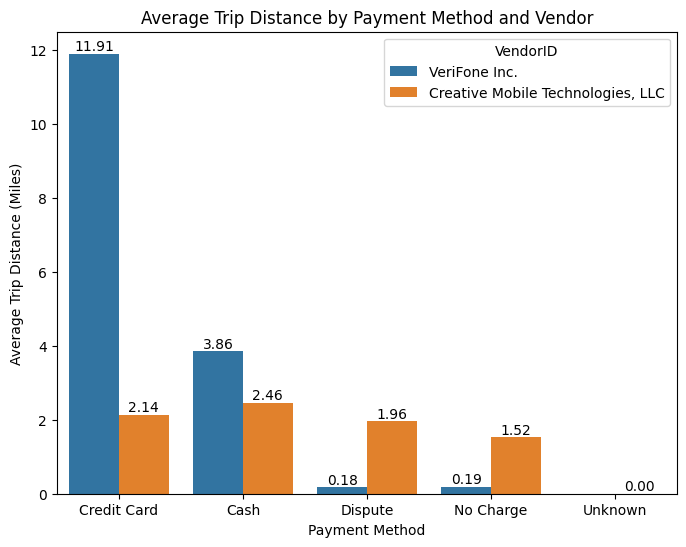

In [103]:
plt.figure(figsize=(8,6))
ax7=sns.barplot(data=avg_trip_distace_by_payment_method_per_vendor, x='payment_type', y='trip_distance', hue='VendorID')
# Menambahkan anotasi pada bar
for container in ax7.containers:
    for bar in container:
        height = bar.get_height()
        ax7.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0,
            f'{height:.2f}',
            ha='center',
            va='bottom'
        )

plt.xlabel('Payment Method')
plt.ylabel('Average Trip Distance (Miles)')
plt.title("Average Trip Distance by Payment Method and Vendor")
plt.show()

# Insight
Dari data tersebut dapat diketahui bahwa metode pembayaran credit card banyak dilakukan oleh penumpang VeriFone Inc. untuk rata-rata jarak perjalanan yang lebih jauh dibandingkan rata-rata perjalanan yang dekat. Sedangkan untuk penumpang vendor Creative Mobile Technologies, LLC lebih banyak menggunakan metode pembayaran cash untuk rata-rata jarak perjalanan yang lebih jauh. Kemudian dapat diketahui juga bahwa Creative Mobile Technologies, LLC terdapat metode pembayaran dispute yang lebih tinggi dibandingkan pada VeriFone Inc., hal ini dapat menjadi indikasi bahwa tedapat penumpang yang mempermasalahkan pembayaran pada rata-rata jarak dekat atau dengan kata lain terdapat kecenderungan bahwa Creative Mobile Technologies, LLC memberikan tarif yang terlalu tinggi untuk perjalanan yang dekat.

# 8. Top Rasio Zona Penjemputan per Vendor

In [104]:
# Hitung jumlah pickup per zona dan vendor
pickup_counts = df.groupby(['VendorID', 'PU_Zone']).size().reset_index(name='pickup_count')

# Hitung total pickup per vendor
total_pickup_vendor = pickup_counts.groupby('VendorID')['pickup_count'].transform('sum')

# Hitung rasio pickup per zona
pickup_counts['pickup_ratio'] = pickup_counts['pickup_count'] / total_pickup_vendor*100

# Ambil 10 zona dengan rasio tertinggi per vendor
top_pickup_ratio = pickup_counts.sort_values(by='pickup_ratio', ascending=False).groupby('VendorID').head(10)
top_pickup_ratio

,VendorID,PU_Zone,pickup_count,pickup_ratio
55,"Creative Mobile Technologies, LLC",East Harlem North,2413,26.951860
259,VeriFone Inc.,East Harlem North,10809,18.485771
260,VeriFone Inc.,East Harlem South,7898,13.507320
56,"Creative Mobile Technologies, LLC",East Harlem South,1119,12.498604
275,VeriFone Inc.,Forest Hills,3741,6.397934
233,VeriFone Inc.,Central Harlem,3631,6.209810
322,VeriFone Inc.,Morningside Heights,3450,5.900260
47,"Creative Mobile Technologies, LLC",Downtown Brooklyn/MetroTech,424,4.735843
121,"Creative Mobile Technologies, LLC",Morningside Heights,421,4.702334
266,VeriFone Inc.,Elmhurst,2687,4.595362


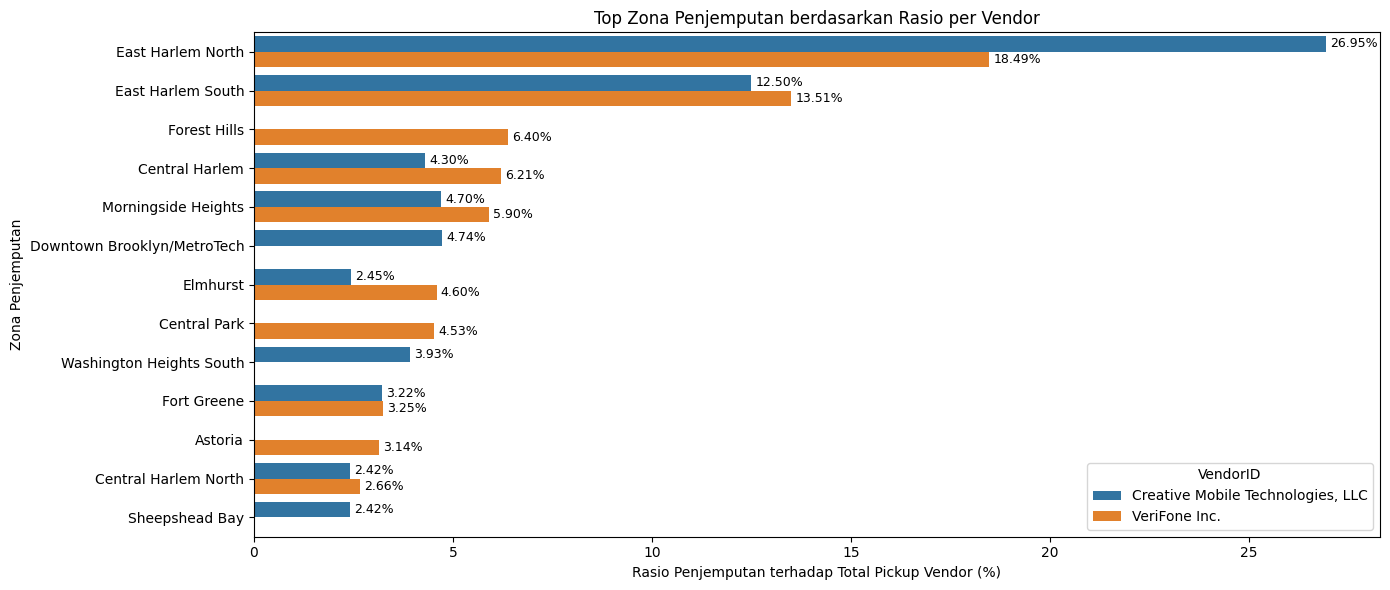

In [105]:
# Visualisasi
plt.figure(figsize=(14, 6))
ax8= sns.barplot(data=top_pickup_ratio, x='pickup_ratio', y='PU_Zone', hue='VendorID')

# Menambahkan anotasi pada bar
for container in ax8.containers:
    for bar in container:
        width = bar.get_width()
        ax8.text(
            width + 0.1,  # geser teks sedikit ke kanan
            bar.get_y() + bar.get_height() / 2,
            f'{width:.2f}%',  # tampilkan 1 desimal
            ha='left',
            va='center',
            fontsize=9,
            color='black'
        )

# Visualisasikan Data
plt.title('Top Zona Penjemputan berdasarkan Rasio per Vendor')
plt.xlabel('Rasio Penjemputan terhadap Total Pickup Vendor (%)')
plt.ylabel('Zona Penjemputan')
plt.tight_layout()
plt.show()

# Insight
Dari data tersebut diperoleh informasi bahwa persentase zona penjemputan penumpang tertinggi berada pada wilayah East Harlem North. Tidak ada penjemputan yang dilakukan oleh Verifone Inc. pada wilayah Washington Heights South, Downtown Brooklyn/MetroTech dan Sheepshead Bay. Kemudian tidak ada penjemputan yang dilakukan oleh Creative Mobile Technologies pada wilayah Forest Hills, Central Park, dan Astoria. Secara keseluruhan persentase tertinggi zona penjemputan Creative Mobile Technologies terpusat pada beberapa daerah saja, sedangkan untuk persentase tertinggi zona penjemputan VeriFone Inc. lebih tersebar secara bervariasi.

# 9. Persebaran Jumlah Penumpang Per Hari

C:\Users\HP\AppData\Local\Temp\ipykernel_22296\2581502499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_day'] = pd.Categorical(df['pickup_day'], categories=days_order, ordered=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_22296\2581502499.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  passenger_per_day = df.groupby('pickup_day')['passenger_count'].sum().reset_index()
C:\Users\HP\AppData\Local\Temp\ipykernel_22296\2581502499.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

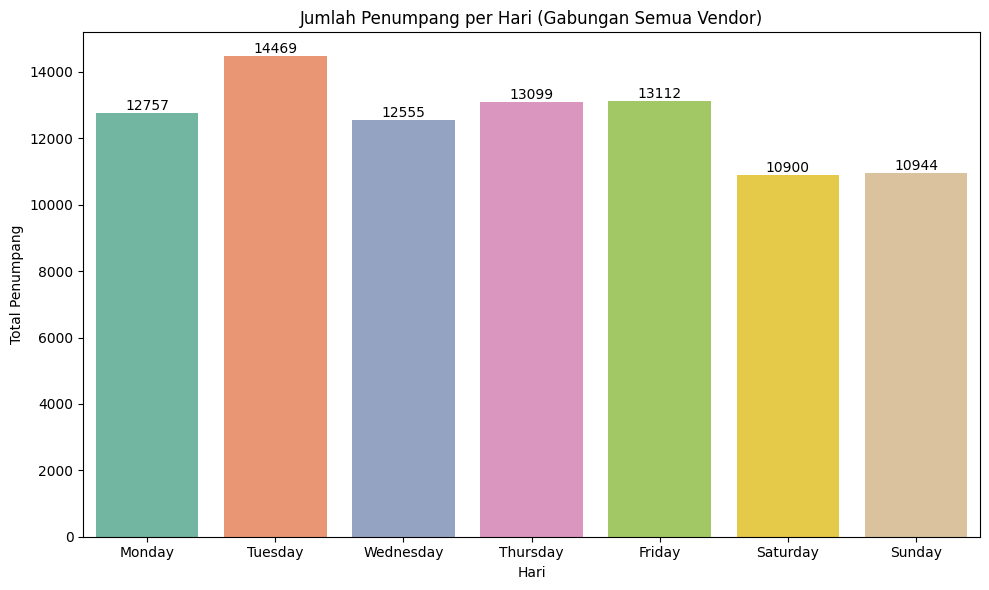

In [128]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['pickup_day'] = pd.Categorical(df['pickup_day'], categories=days_order, ordered=True)

# Hitung jumlah penumpang per hari (tanpa membedakan vendor)
passenger_per_day = df.groupby('pickup_day')['passenger_count'].sum().reset_index()

# Visualisasikan
plt.figure(figsize=(10, 6))
ax11 = sns.barplot(data=passenger_per_day, x='pickup_day', y='passenger_count', palette='Set2')
for container in ax11.containers:
    for bar in container:
        height = bar.get_height()
        ax11.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0,
            f'{height:.0f}',
            ha='center',
            va='bottom'
        )

plt.title('Jumlah Penumpang per Hari (Gabungan Semua Vendor)')
plt.xlabel('Hari')
plt.ylabel('Total Penumpang')
plt.tight_layout()
plt.show()

# Insight: 

Data diatas menunjukkan bahwa jumlah perjalanan cenderung lebih tinggi pada hari kerja (Senin hingga Jumat), terutama hari Jumat, dibandingkan akhir pekan. Pada hari Sabtu dan Minggu menunjukkan penurunan signifikan dalam jumlah perjalanan, hal tesebut dapat disebabkan karena para pengguna layanan taksi lebih memilih diam dirumah atau berkendara dengan kendaraan pribadi ketika hari libur.

# 10. Jumlah Penumpang Harian dalam Satu Bulan 

C:\Users\HP\AppData\Local\Temp\ipykernel_22296\519021225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['day'] = df_month['lpep_pickup_datetime'].dt.day


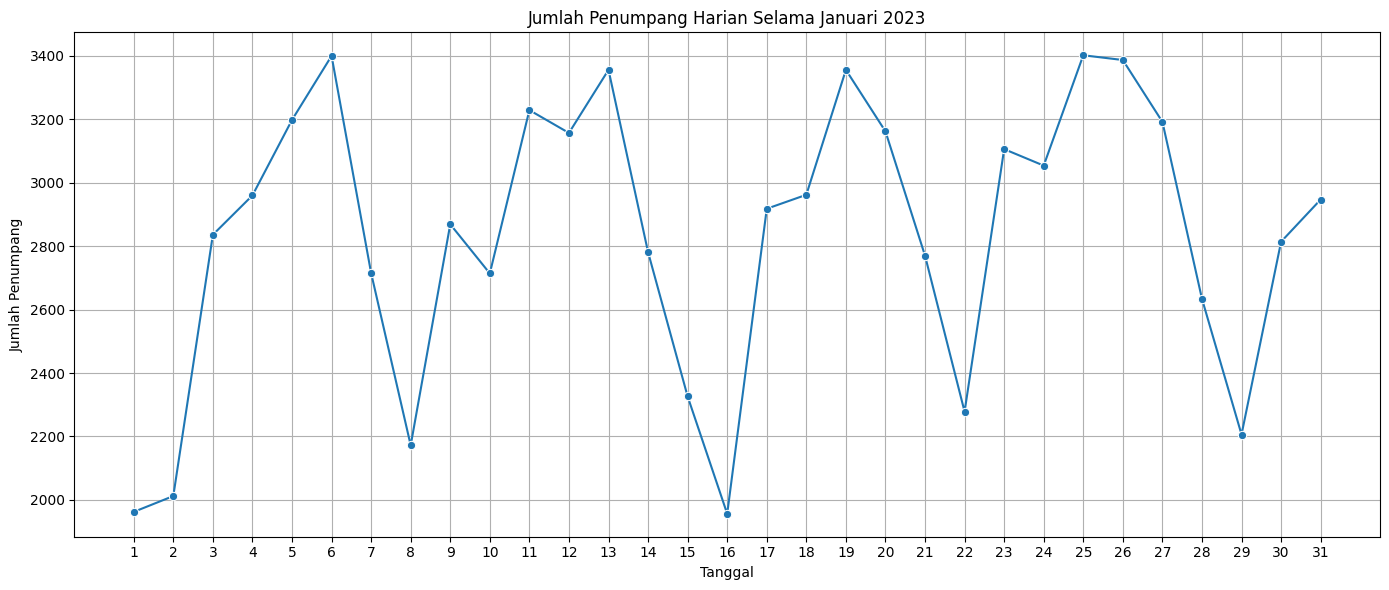

In [118]:
# Ambil data dalam satu bulan tertentu, misalnya Januari 2023
df_month = df[(df['lpep_pickup_datetime'].dt.month == 1) & 
              (df['lpep_pickup_datetime'].dt.year == 2023)]

# Buat kolom tanggal saja
df_month['day'] = df_month['lpep_pickup_datetime'].dt.day

# Hitung total penumpang per tanggal
daily_passengers = df_month.groupby('day')['passenger_count'].sum().reset_index()

# Visualisasi
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_passengers, x='day', y='passenger_count', marker='o')
plt.title('Jumlah Penumpang Harian Selama Januari 2023')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penumpang')
plt.grid(True)
plt.xticks(range(1,32))
plt.tight_layout()
plt.show()

# Insight
Data tersebut menunjukkan bahwa jumlah penumpang per hari dalam sebulan sangat fluktuatif, diasumsikan bahwa titik terendah pada bulan Januari 2023 terjadi pada akhir pekan khususnya hari minggu.

# 11. Jumlah Penumpang Per Jam Per Hari

C:\Users\HP\AppData\Local\Temp\ipykernel_22296\3577847993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
C:\Users\HP\AppData\Local\Temp\ipykernel_22296\3577847993.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_day'] = pd.Categorical(df['pickup_day'], categories=days_order, ordered=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_22296\3577847993.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to Tr

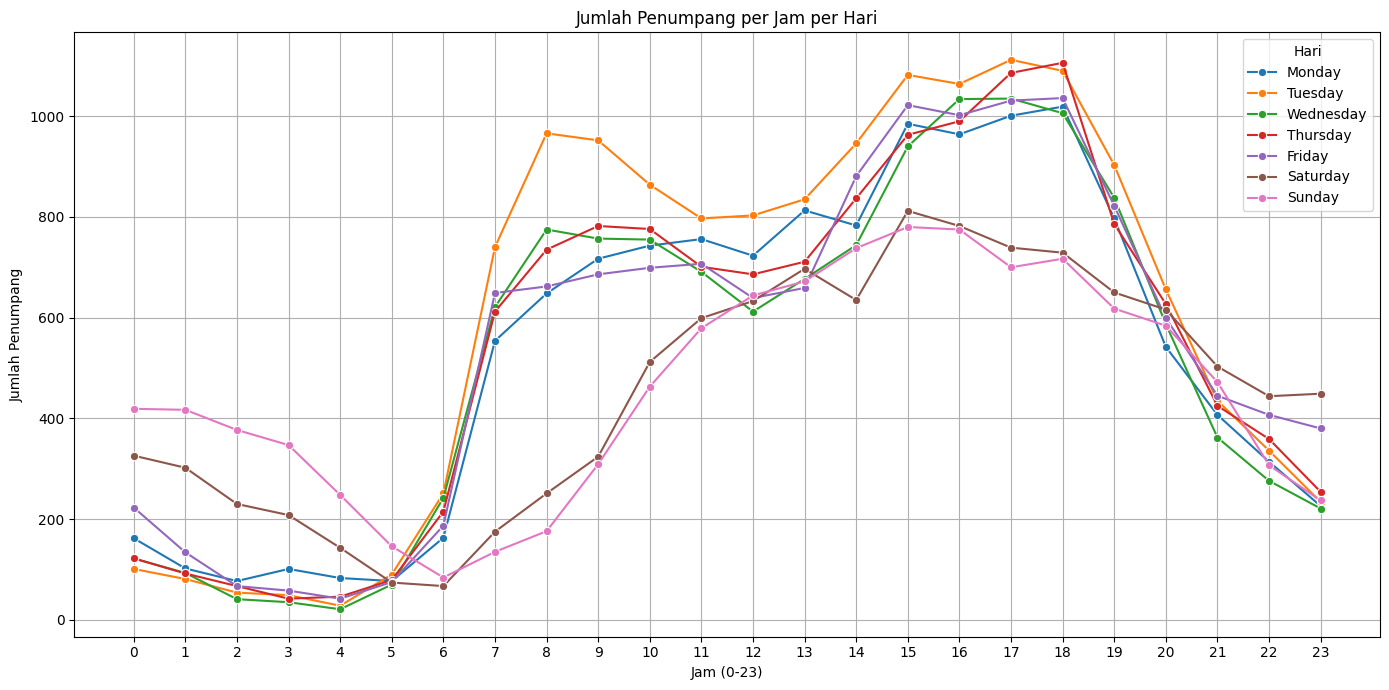

In [121]:
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour

# Urutkan hari biar konsisten
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['pickup_day'] = pd.Categorical(df['pickup_day'], categories=days_order, ordered=True)

# Grouping: total penumpang per jam per hari
hourly_passengers = df.groupby(['pickup_day', 'pickup_hour'])['passenger_count'].sum().reset_index()

# Visualisasi line plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=hourly_passengers, x='pickup_hour', y='passenger_count', hue='pickup_day', marker='o')

plt.title('Jumlah Penumpang per Jam per Hari')
plt.xlabel('Jam (0-23)')
plt.ylabel('Jumlah Penumpang')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Hari')
plt.tight_layout()
plt.show()

# Insight
Data diatas menunjukkan bahwa jika kita menganalisis jumlah penumpang perhari dalam seminggu berdasarkan jam, diperoleh infomasi bahwa jumlah penumpang pada hari Selasa cenderung terus mengalami peningkatan tertinggi dibandingkan dengan hari lainnya. Terdapat penemuan menarik yaitu pada hari Sabtu dan Minggu yang mana taksi mendapatkan penumpang dengan jumlah yang cukup banyak pada pukul 00.00 sampai dengan pukul 05.00, hal ini tidak terjadi pada hari lainnya. Indikasi penyebab dari hal ini terjadi karena pada akhir pekan sebagian pengguna taksi banyak menghabiskan waktu diluar dan pulang larut malam.

# Kesimpulan

- Dari segi kegiatan operasional, Verifone Inc. memiliki total jarak tempuh perjalanan yang lebih jauh dibandingkan Creative Mobile Technologies, sehingga total revenue yang dihasilkan VeriFone Inc. lebih besar dari pada Creative Mobile Technologies. Kemudian total perjalanan yang jauh dari VeriFone Inc. ini juga membuat rata-rata jarak tempuh dan durasi perjalanan vendor menjadi lebih besar dibandingkan Creative Mobile Technologies.
- Metode pembayaran yang banyak dilakukan oleh penumpang masing-masing vendor secara keseluruhan berada pada metode pembayaran credit card.
- Zona yang paling sering menjadi titik penjemputan taksi oleh kedua vendor yaitu East Harlem North dan East Harlem South.
- Jumlah penumpang pengguna layanan taksi kedua vendor paling banyak terjadi peningkatan pada hari kerja, sedangkan pada hari libur jumlah penumpang cenderung menurun.


# Saran:
Adapun saran yang dapat diberikan untuk Verifone Inc., yaitu:
- Memfokuskan ketersediaan armada dan pengemudi pada hari kerja, terutama pada puncak Jumat, untuk memaksimalkan pendapatan.
- Membuat strategi promosi akhir pekan karena volume turun di akhir pekan, vendor dapat menawarkan:
    - Diskon khusus Sabtu-Minggu
    - Bundling perjalanan akhir pekan
    - Promo liburan atau acara khusus
- Promosikan rute populer (jarak jauh) sebagai layanan premium.
- Bisa menawarkan program loyalitas untuk pelanggan reguler perjalanan panjang.
- Jika VeriFone Inc. lebih dipilih untuk segment perjalanan jarak jauh maka dapat dibuat branding seperti "Solusi Untuk Perjalanan Jauh".
- Terus meningkatkan kualitas layanan agar mendapatkan keuntungan yang semakin besar.
-  Memperbaiki kualitas layanan mengingat masih terdapatnya frekuensi pembayaran dispute yang dapat diakibatkan karena penumpang mempermasalahkan pembayaran.

Kemudian adapun Saran yang dapat diberikan untuk Creative Mobile Technologies, yaitu:
- Meningkatkan promosi atau kerja sama dengan lokasi ramai
- Pertimbangkan perluasan cakupan area, terutama ke zona dengan permintaan jarak jauh (misalnya bandara, kawasan industri).
- Menempatkan armada kendaraan agar lebih tersebear luas di berbagai wilayah.
- Jika Creative Mobile Technologies lebih dipilih untuk segment perjalanan jarak dekat maka dapat dibuat branding seperti "Cepat dan Nyaman Untuk Jarak Dekat".
- Untuk mempermudah metode pembayaran Creative Mobile Technologies dapat meningkatkan layanan dalam transaksi menggunakan credit card.
- Meningkatkan kualitas layanan mengingat rendahnya tip yang diperoleh dan banyaknya jumlah pembayaran dispute dan no charge.
- Membuat tarif yang masuk akal mengingat banyaknya pembayaran dispute pada penumpang jarak dekat yang dapat diakibatkan karena tarif yang terlalu tinggi untuk perjalanan dekat.


In [134]:
df.to_csv('Taxi NYC TLC Cleaned.csv')